In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-vertebrae-xray-images/xkt857dsxk-1/331/331/Spond/N40, Olisthesis L5-S1, M, 15 Yrs.jpg
/kaggle/input/the-vertebrae-xray-images/xkt857dsxk-1/331/331/Spond/N10,S,63,F_1003_2.jpg
/kaggle/input/the-vertebrae-xray-images/xkt857dsxk-1/331/331/Spond/N21, Olisthesis L5-S1, F, 54 Yrs.jpg
/kaggle/input/the-vertebrae-xray-images/xkt857dsxk-1/331/331/Spond/N25, Olisthesis L4-5, F, 50 Yrs.jpg
/kaggle/input/the-vertebrae-xray-images/xkt857dsxk-1/331/331/Spond/N11, Olisthesis. L4-5, M, 48 Yrs.jpg
/kaggle/input/the-vertebrae-xray-images/xkt857dsxk-1/331/331/Spond/N41,S,54,M_1_0.jpg
/kaggle/input/the-vertebrae-xray-images/xkt857dsxk-1/331/331/Spond/N13, Olisthesis L4-5, F, 60 yrs.jpg
/kaggle/input/the-vertebrae-xray-images/xkt857dsxk-1/331/331/Spond/N23,S,78,M_1001_0.jpg
/kaggle/input/the-vertebrae-xray-images/xkt857dsxk-1/331/331/Spond/N6, Olisthesis L4-5, F, 60 Yrs.jpg
/kaggle/input/the-vertebrae-xray-images/xkt857dsxk-1/331/331/Spond/N14, Olisthesis L4-5, M, 48 Yrs.jpg
/kaggle/input

In [2]:
from PIL import Image
import matplotlib.pyplot as plt


base_path = '/kaggle/input/the-vertebrae-xray-images/xkt857dsxk-1/331/331'

In [3]:
classes = ['Normal', 'Scol', 'Spond']
image_counts = {}

for class_name in classes:
    folder_path = os.path.join(base_path, class_name)
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
    image_counts[class_name] = len(image_files)

df_counts = pd.DataFrame(list(image_counts.items()), columns=['Class', 'ImageCount'])

In [4]:
df_counts

,Class,ImageCount
0,Normal,71
1,Scol,185
2,Spond,78


In [5]:
import seaborn as sns

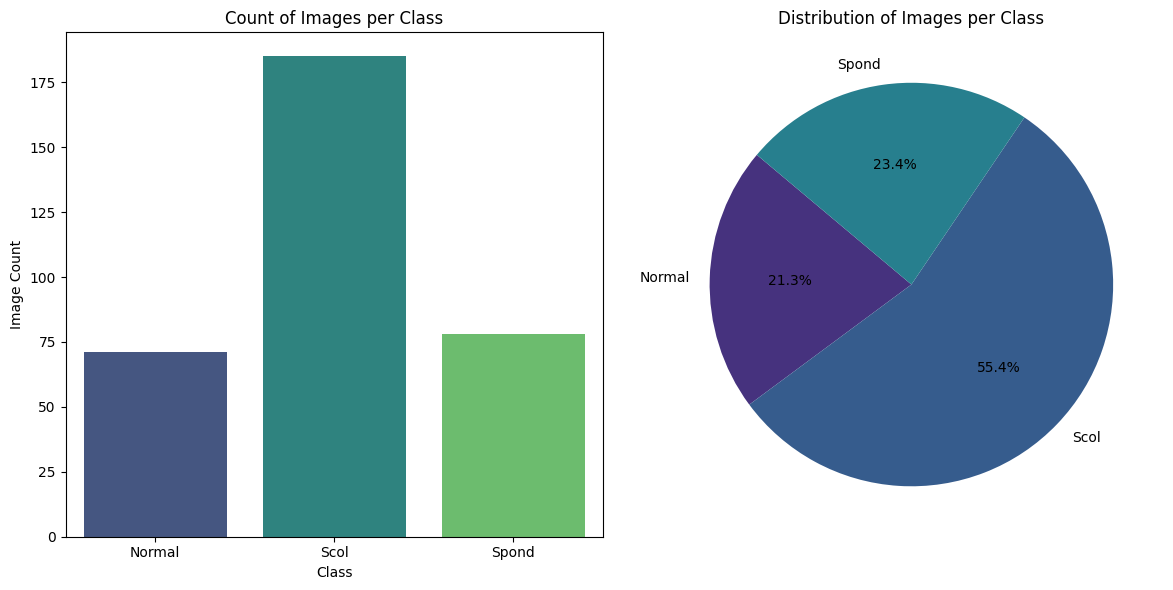

In [6]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(data=df_counts, x='Class', y='ImageCount', palette="viridis")
plt.title('Count of Images per Class')
plt.ylabel('Image Count')
plt.xlabel('Class')

plt.subplot(1, 2, 2)
plt.pie(df_counts['ImageCount'], labels=df_counts['Class'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis"))
plt.title('Distribution of Images per Class')

plt.tight_layout()
plt.show()

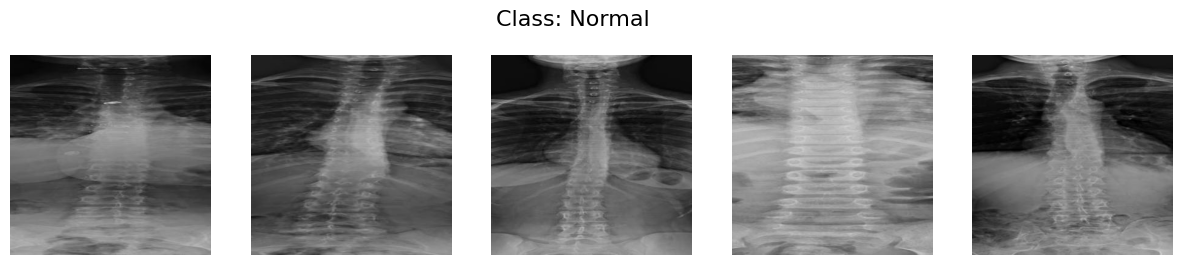

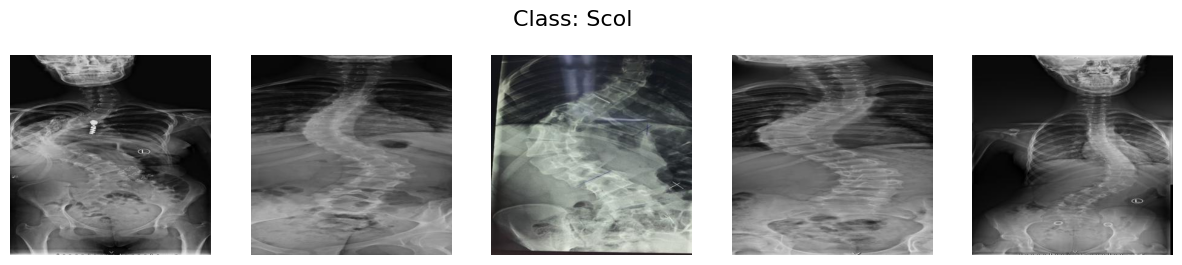

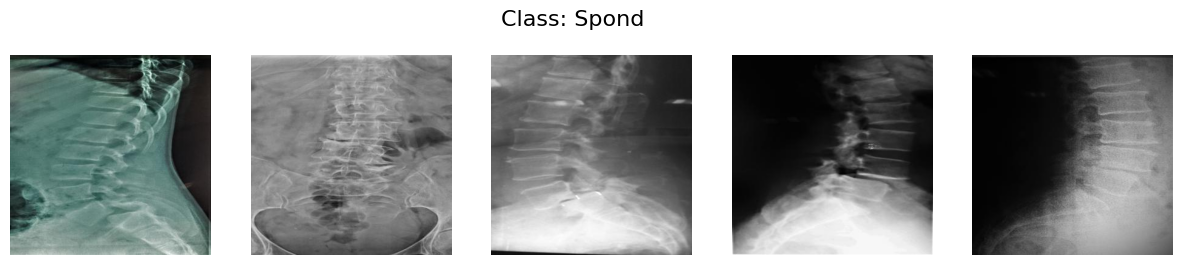

In [7]:
for class_name in classes:
    folder_path = os.path.join(base_path, class_name)
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))][:5]  # Get first 5 images
    
    plt.figure(figsize=(15, 3))
    plt.suptitle(f"Class: {class_name}", fontsize=16)
    
    for i, image_file in enumerate(image_files):
        image_path = os.path.join(folder_path, image_file)
        image = Image.open(image_path)
        
        plt.subplot(1, 5, i + 1)
        plt.imshow(image, cmap='gray')
        plt.axis('off')
    
    plt.show()

In [8]:
dataset_path = base_path

In [9]:
image_data = []

folders = {'Normal': 1, 'Scol': 2, 'Spond': 3}

for folder_name, label in folders.items():
    folder_path = os.path.join(dataset_path, folder_name)
    
    if os.path.exists(folder_path):
        image_files = os.listdir(folder_path)
        
        for image_file in image_files:
            image_data.append((os.path.join(folder_path, image_file), label))
    else:
        print(f"Folder {folder_path} not found.")

df = pd.DataFrame(image_data, columns=['image_path', 'label'])

In [10]:
df.head()

,image_path,label
0,/kaggle/input/the-vertebrae-xray-images/xkt857...,1
1,/kaggle/input/the-vertebrae-xray-images/xkt857...,1
2,/kaggle/input/the-vertebrae-xray-images/xkt857...,1
3,/kaggle/input/the-vertebrae-xray-images/xkt857...,1
4,/kaggle/input/the-vertebrae-xray-images/xkt857...,1


In [11]:
df.tail()

,image_path,label
333,/kaggle/input/the-vertebrae-xray-images/xkt857...,3
334,/kaggle/input/the-vertebrae-xray-images/xkt857...,3
335,/kaggle/input/the-vertebrae-xray-images/xkt857...,3
336,/kaggle/input/the-vertebrae-xray-images/xkt857...,3
337,/kaggle/input/the-vertebrae-xray-images/xkt857...,3


In [12]:
df.shape

(338, 2)

In [13]:
df.columns

Index(['image_path', 'label'], dtype='object')

In [14]:
df.duplicated().sum()

0

In [15]:
df.isnull().sum()

image_path    0
label         0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  338 non-null    object
 1   label       338 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.4+ KB


In [17]:
from imblearn.over_sampling import RandomOverSampler

In [18]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(df[['image_path']], df['label'])

In [19]:
df_resampled = pd.DataFrame(X_resampled, columns=['image_path'])
df_resampled['label'] = y_resampled

In [20]:
print("\nClass distribution after oversampling:")
print(df_resampled['label'].value_counts())


Class distribution after oversampling:
label
1    188
2    188
3    188
Name: count, dtype: int64


In [21]:
df_resampled

,image_path,label
0,/kaggle/input/the-vertebrae-xray-images/xkt857...,1
1,/kaggle/input/the-vertebrae-xray-images/xkt857...,1
2,/kaggle/input/the-vertebrae-xray-images/xkt857...,1
3,/kaggle/input/the-vertebrae-xray-images/xkt857...,1
4,/kaggle/input/the-vertebrae-xray-images/xkt857...,1
...,...,...
559,/kaggle/input/the-vertebrae-xray-images/xkt857...,3
560,/kaggle/input/the-vertebrae-xray-images/xkt857...,3
561,/kaggle/input/the-vertebrae-xray-images/xkt857...,3
562,/kaggle/input/the-vertebrae-xray-images/xkt857...,3


In [22]:
import time
import shutil
import pathlib
import itertools
from PIL import Image

import cv2
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

import warnings
warnings.filterwarnings("ignore")

print ('check')

check


In [23]:
df_resampled['label'] = df_resampled['label'].astype(str)

In [24]:
train_df_new, temp_df_new = train_test_split(
    df_resampled,
    train_size=0.8,  
    shuffle=True,
    random_state=42,
    stratify=df_resampled['label']  
)

valid_df_new, test_df_new = train_test_split(
    temp_df_new,
    test_size=0.5,  
    shuffle=True,
    random_state=42,
    stratify=temp_df_new['label'] 
)

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 16
img_size = (224, 224)
channels = 3  
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator(rescale=1./255)  
ts_gen = ImageDataGenerator(rescale=1./255)

train_gen_new = tr_gen.flow_from_dataframe(
    train_df_new,
    x_col='image_path',  
    y_col='label',     
    target_size=img_size,
    class_mode='sparse',  
    color_mode='rgb', 
    shuffle=True,
    batch_size=batch_size
)

valid_gen_new = ts_gen.flow_from_dataframe(
    valid_df_new,
    x_col='image_path',  
    y_col='label',     
    target_size=img_size,
    class_mode='sparse',  
    color_mode='rgb', 
    shuffle=True,
    batch_size=batch_size
)

test_gen_new = ts_gen.flow_from_dataframe(
    test_df_new,
    x_col='image_path', 
    y_col='label',    
    target_size=img_size,
    class_mode='sparse',  
    color_mode='rgb', 
    shuffle=False,  
    batch_size=batch_size
)

Found 451 validated image filenames belonging to 3 classes.
Found 56 validated image filenames belonging to 3 classes.
Found 57 validated image filenames belonging to 3 classes.


In [26]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [27]:
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    print("Using GPU")
else:
    print("Using CPU")

Using GPU


In [33]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [39]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, GaussianNoise, Input, MultiHeadAttention, Reshape
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def create_xception_model(input_shape):
    
    inputs = Input(shape=input_shape)
    
    base_model = Xception(weights='imagenet', input_tensor=inputs, include_top=False)
    
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output

    height, width, channels = 7, 7, 2048  
    x = Reshape((height * width, channels))(x)  
   
    attention_output = MultiHeadAttention(num_heads=8, key_dim=channels)(x, x) 

    attention_output = Reshape((height, width, channels))(attention_output)
    
    x = GaussianNoise(0.25)(attention_output)
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.25)(x)
    x = Dropout(0.25)(x)
    outputs = Dense(3, activation='softmax')(x)  

    model = Model(inputs=inputs, outputs=outputs)

    return model

input_shape = (224, 224, 3)
cnn_model = create_xception_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [40]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=5,  
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/5


I0000 00:00:1730278390.449103     502 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1', 1300 bytes spill stores, 1284 bytes spill loads



27/29 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step - accuracy: 0.7467 - loss: 0.5626

I0000 00:00:1730278417.695214     533 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1', 1300 bytes spill stores, 1284 bytes spill loads



29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 784ms/step - accuracy: 0.7527 - loss: 0.5509

I0000 00:00:1730278434.776468     566 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1', 1300 bytes spill stores, 1284 bytes spill loads



29/29 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.7554 - loss: 0.5456 - val_accuracy: 0.8393 - val_loss: 0.4499
Epoch 2/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 241ms/step - accuracy: 0.9538 - loss: 0.1700 - val_accuracy: 0.9643 - val_loss: 0.1529
Epoch 3/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 245ms/step - accuracy: 0.9676 - loss: 0.0967 - val_accuracy: 0.9821 - val_loss: 0.1446
Epoch 4/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 247ms/step - accuracy: 0.9854 - loss: 0.0545 - val_accuracy: 0.9821 - val_loss: 0.1417
Epoch 5/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 247ms/step - accuracy: 0.9820 - loss: 0.0404 - val_accuracy: 0.9464 - val_loss: 0.1416


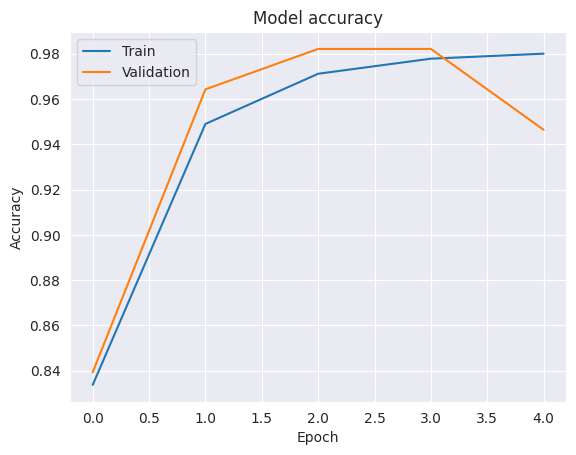

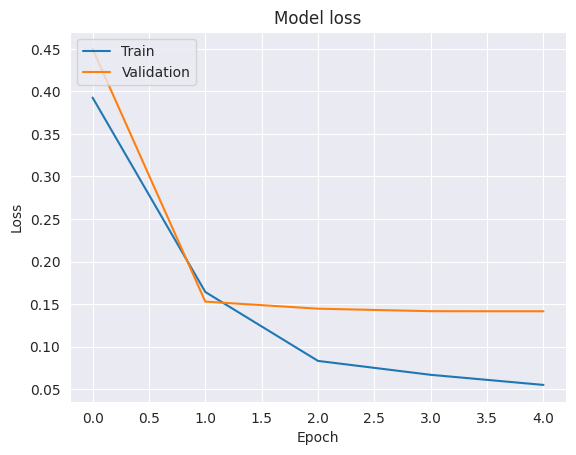

In [41]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [42]:
test_labels = test_gen_new.classes  
predictions = cnn_model.predict(test_gen_new)  
predicted_classes = np.argmax(predictions, axis=1)

3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step

I0000 00:00:1730278896.745293     663 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1', 1300 bytes spill stores, 1284 bytes spill loads



4/4 ━━━━━━━━━━━━━━━━━━━━ 17s 5s/step 


In [43]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           1       0.95      1.00      0.97        19
           2       1.00      0.74      0.85        19
           3       0.83      1.00      0.90        19

    accuracy                           0.91        57
   macro avg       0.93      0.91      0.91        57
weighted avg       0.93      0.91      0.91        57



In [44]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

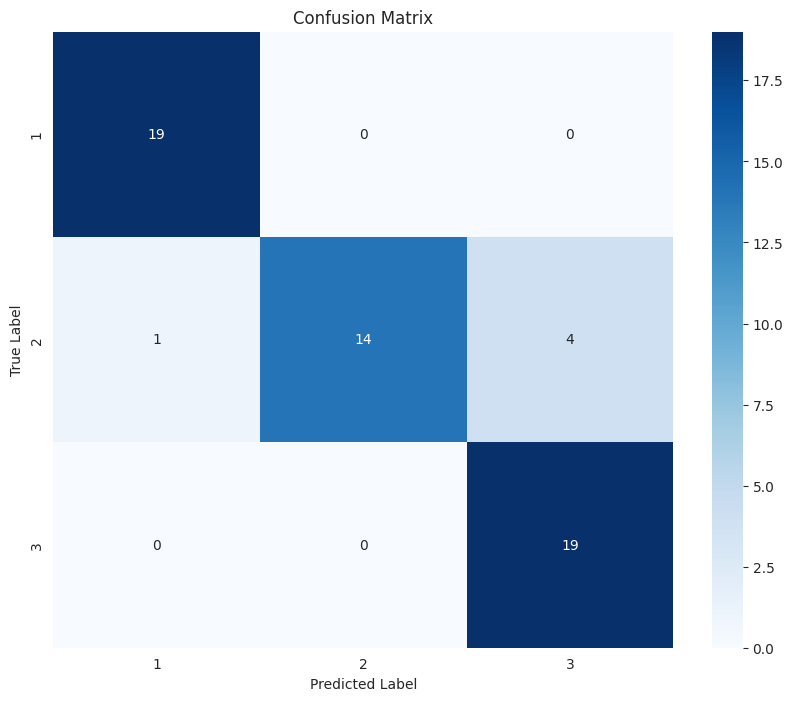

In [45]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [46]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, GaussianNoise, Input, MultiHeadAttention, Reshape
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def create_inception_model(input_shape):
    
    inputs = Input(shape=input_shape)

    base_model = InceptionV3(weights='imagenet', input_tensor=inputs, include_top=False)
    
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output

    height, width, channels = 5, 5, 2048  
    x = Reshape((height * width, channels))(x) 

    attention_output = MultiHeadAttention(num_heads=8, key_dim=channels)(x, x)  

    attention_output = Reshape((height, width, channels))(attention_output)
    
    x = GaussianNoise(0.25)(attention_output)
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.25)(x)
    x = Dropout(0.25)(x)
    outputs = Dense(3, activation='softmax')(x)  

    model = Model(inputs=inputs, outputs=outputs)

    return model

input_shape = (224, 224, 3)
cnn_model = create_inception_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [47]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=5,  
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 38s 722ms/step - accuracy: 0.7887 - loss: 0.5400 - val_accuracy: 0.9286 - val_loss: 0.2511
Epoch 2/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 158ms/step - accuracy: 0.9628 - loss: 0.1313 - val_accuracy: 0.9464 - val_loss: 0.1361
Epoch 3/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 128ms/step - accuracy: 0.9874 - loss: 0.0509 - val_accuracy: 0.7143 - val_loss: 1.3914
Epoch 4/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 157ms/step - accuracy: 0.9906 - loss: 0.0443 - val_accuracy: 0.9643 - val_loss: 0.0929
Epoch 5/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step - accuracy: 0.9754 - loss: 0.0648 - val_accuracy: 0.8036 - val_loss: 0.9407


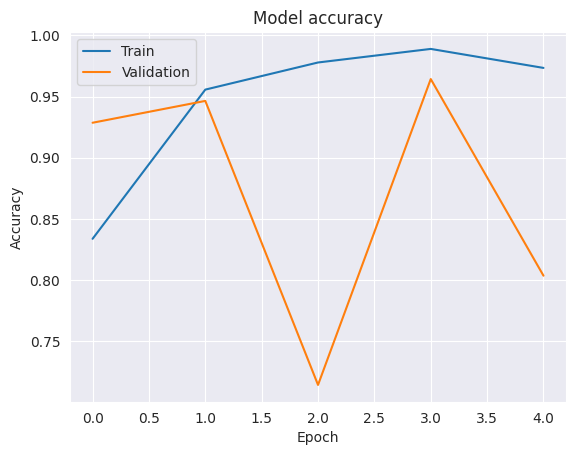

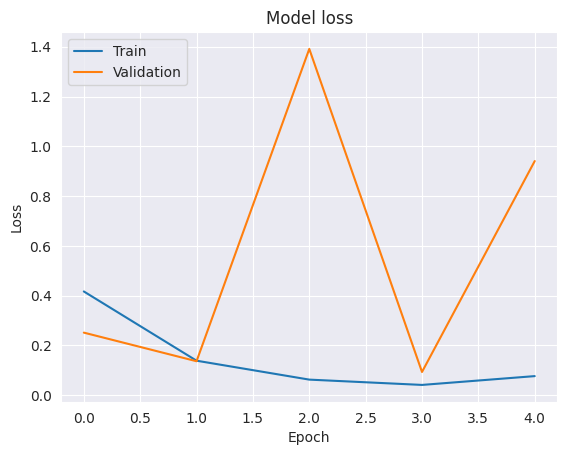

In [48]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [49]:
test_labels = test_gen_new.classes  
predictions = cnn_model.predict(test_gen_new)  
predicted_classes = np.argmax(predictions, axis=1)

3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step

I0000 00:00:1730279417.792364     811 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1', 1300 bytes spill stores, 1284 bytes spill loads



4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 5s/step


In [50]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00        19

    accuracy                           1.00        57
   macro avg       1.00      1.00      1.00        57
weighted avg       1.00      1.00      1.00        57



In [51]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

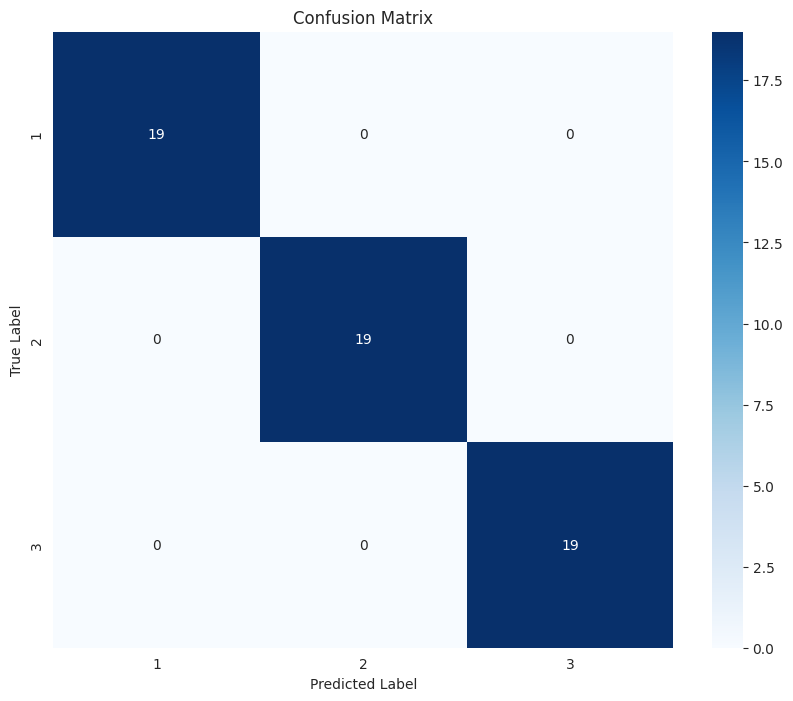

In [52]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [59]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, GaussianNoise, Input, MultiHeadAttention, Reshape
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def create_densenet_model(input_shape):
    
    inputs = Input(shape=input_shape)
    
    base_model = DenseNet121(weights='imagenet', input_tensor=inputs, include_top=False)
    
    for layer in base_model.layers:
        layer.trainable = False
    
    x = base_model.output
    
    height, width, channels = x.shape[1], x.shape[2], x.shape[3]
    x = Reshape((height * width, channels))(x)
    
    attention_output = MultiHeadAttention(num_heads=8, key_dim=channels)(x, x)
    
    attention_output = Reshape((height, width, channels))(attention_output)
    
    x = GaussianNoise(0.25)(attention_output)
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.25)(x)
    x = Dropout(0.25)(x)
    outputs = Dense(3, activation='softmax')(x)
    
    model = Model(inputs=inputs, outputs=outputs)
    
    return model

input_shape = (224, 224, 3)
densenet_model = create_densenet_model(input_shape)

densenet_model.compile(optimizer=Adam(learning_rate=0.0001),
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [60]:
history = densenet_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=5,  
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/5


I0000 00:00:1730280682.880594    1104 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1', 1300 bytes spill stores, 1284 bytes spill loads



12/29 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.7186 - loss: 0.6596

I0000 00:00:1730280710.322770    1136 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1', 1300 bytes spill stores, 1284 bytes spill loads



29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 911ms/step - accuracy: 0.8063 - loss: 0.5087

I0000 00:00:1730280739.418234    1168 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1', 1300 bytes spill stores, 1284 bytes spill loads



29/29 ━━━━━━━━━━━━━━━━━━━━ 94s 2s/step - accuracy: 0.8087 - loss: 0.5041 - val_accuracy: 0.7679 - val_loss: 0.6291
Epoch 2/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.9567 - loss: 0.1413 - val_accuracy: 0.9821 - val_loss: 0.2262
Epoch 3/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.9664 - loss: 0.1068 - val_accuracy: 0.6250 - val_loss: 0.9495
Epoch 4/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.9747 - loss: 0.0660 - val_accuracy: 0.8571 - val_loss: 0.3545
Epoch 5/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.9901 - loss: 0.0383 - val_accuracy: 0.9643 - val_loss: 0.1301


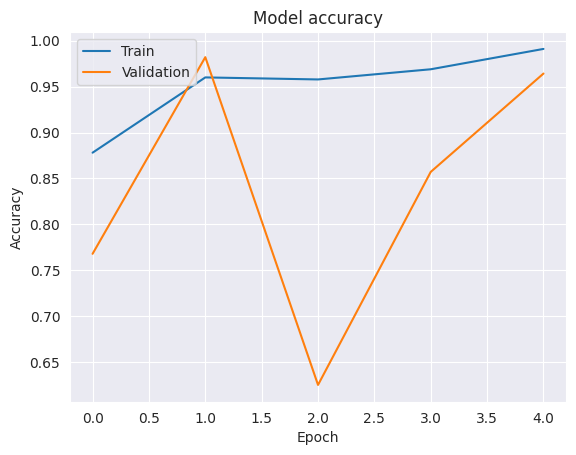

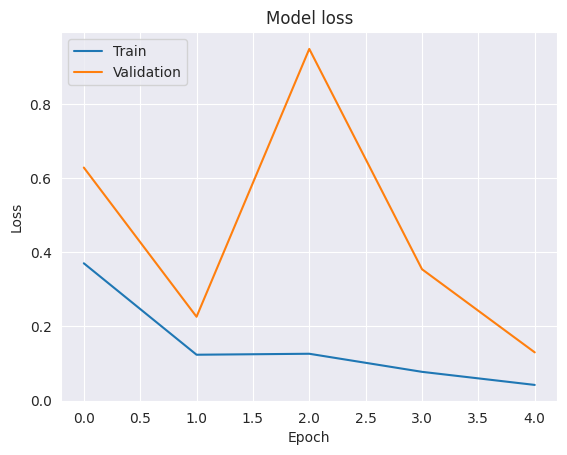

In [61]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [63]:
test_labels = test_gen_new.classes  
predictions = densenet_model.predict(test_gen_new)  
predicted_classes = np.argmax(predictions, axis=1)

3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step

I0000 00:00:1730280843.359975    1279 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1', 1300 bytes spill stores, 1284 bytes spill loads



4/4 ━━━━━━━━━━━━━━━━━━━━ 27s 6s/step


In [64]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           1       1.00      0.89      0.94        19
           2       0.59      1.00      0.75        19
           3       1.00      0.42      0.59        19

    accuracy                           0.77        57
   macro avg       0.86      0.77      0.76        57
weighted avg       0.86      0.77      0.76        57



In [65]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

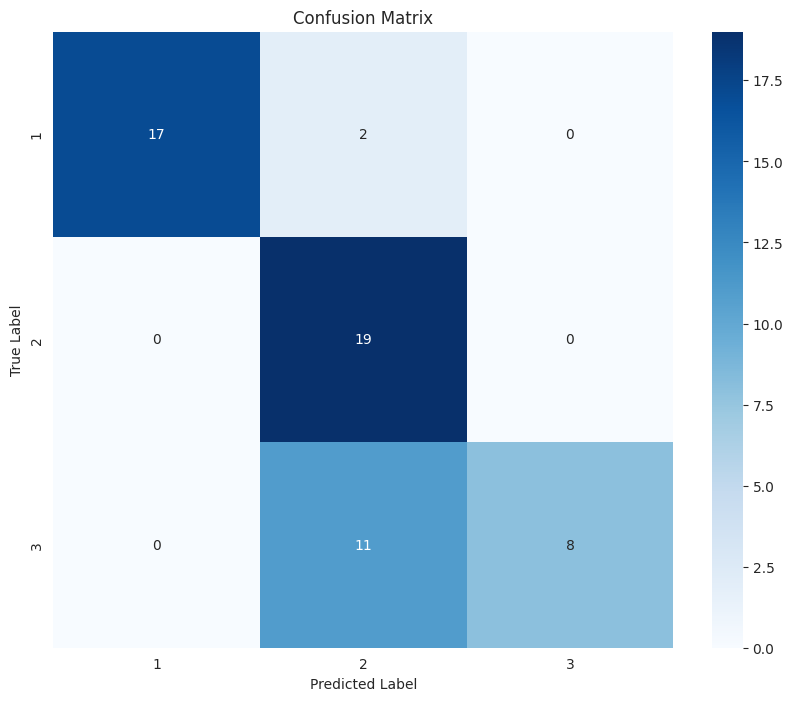

In [66]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Thanks !!!